In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# rainforest classifier
from sklearn.ensemble import RandomForestClassifier

# linear regession classifier
from sklearn.linear_model import LogisticRegression

# KNN classifier
from sklearn.neighbors import KNeighborsClassifier

import wrangle as w
import explore as e 
import model as m

In [2]:
# # acquiring, cleaning, and adding features to data
df = w.get_telco_data()
# df = w.prep_telco()

In [3]:
tr, va, tt = w.split_data(df, "churn")

In [4]:
tt

,payment_type_id,internet_service_type_id,customer_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,churn_month,signup_date,internet_service_type,payment_type
3160,2,2,4531-AUZNK,2,Female,0,Yes,Yes,51,Yes,...,No,Yes,95.15,5000.05,No,One year,None,2017-10-21 18:07:34,Fiber optic,Mailed check
1577,3,1,2296-DKZFP,3,Female,0,Yes,No,65,Yes,...,Yes,No,71.00,4386.2,No,Two year,None,2016-08-21 18:07:34,DSL,Bank transfer (automatic)
6823,1,2,9692-TUSXH,1,Female,0,No,No,18,Yes,...,Yes,Yes,96.05,1740.7,Yes,Month-to-month,2022-01-31,2020-07-21 18:07:34,Fiber optic,Electronic check
3615,1,2,5129-JLPIS,1,Male,0,No,No,25,Yes,...,Yes,Yes,105.50,2686.05,No,Month-to-month,None,2019-12-21 18:07:34,Fiber optic,Electronic check
882,1,2,1273-MTETI,1,Female,1,No,No,4,Yes,...,Yes,Yes,88.85,372.45,Yes,Month-to-month,2022-01-31,2021-09-21 18:07:34,Fiber optic,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1,1,1597-FZREH,1,Female,0,No,No,2,Yes,...,Yes,No,76.40,160.8,Yes,Month-to-month,2022-01-31,2021-11-21 18:07:34,DSL,Electronic check
6441,2,1,9117-SHLZX,1,Male,0,No,No,1,Yes,...,No,Yes,45.70,45.7,Yes,Month-to-month,2022-01-31,2021-12-21 18:07:34,DSL,Mailed check
5985,3,3,8441-SHIPE,3,Female,0,No,No,67,Yes,...,No internet service,Yes,25.60,1790.35,No,Two year,None,2016-06-21 18:07:34,None,Bank transfer (automatic)
2452,4,1,3511-BFTJW,3,Male,0,Yes,Yes,72,No,...,No,No,38.50,2763,No,Two year,None,2016-01-21 18:07:34,DSL,Credit card (automatic)


# Summarize df 

In [5]:
# df with only selected and tested features
df_2 = w.prep_telco()

In [6]:
# Get information about df, such as column names, rows, datatypes, non-missing values
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   partner            7043 non-null   uint8
 1   dependents         7043 non-null   uint8
 2   paperless_billing  7043 non-null   uint8
 3   automatic_payment  7043 non-null   int64
 4   churn              7043 non-null   uint8
 5   gender             7043 non-null   uint8
dtypes: int64(1), uint8(5)
memory usage: 89.5 KB


In [7]:
# Get summary statistics for numeric columns.
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
partner,7043.0,0.483033,0.499748,0.0,0.0,0.0,1.0,1.0
dependents,7043.0,0.299588,0.458110,0.0,0.0,0.0,1.0,1.0
paperless_billing,7043.0,0.592219,0.491457,0.0,0.0,1.0,1.0,1.0
automatic_payment,7043.0,0.435326,0.495835,0.0,0.0,0.0,1.0,1.0
churn,7043.0,0.265370,0.441561,0.0,0.0,0.0,1.0,1.0
gender,7043.0,0.504756,0.500013,0.0,0.0,1.0,1.0,1.0


In [8]:
# Use .describe with object columns.

obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))
    print('----------------------')


0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64
0002-ORFBO    0.000142
6616-AALSR    0.000142
6625-UTXEW    0.000142
6625-IUTTT    0.000142
6625-FLENO    0.000142
                ...   
3352-RICWQ    0.000142
3352-ALMCK    0.000142
3351-NQLDI    0.000142
3351-NGXYI    0.000142
9995-HOTOH    0.000142
Name: customer_id, Length: 7043, dtype: float64
----------------------
Male      3555
Female    3488
Name: gender, dtype: int64
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
----------------------
No     3641
Yes    3402
Name: partner, dtype: int64
No     0.516967
Yes    0.483033
Name: partner, dtype: float64
----------------------
No     4933
Yes    2110
Name: dependents, dtype: int64
No     0.700412
Yes    0.299588
Name: dependents, dtype: float64
----------------------
Yes    6361
No      682
Nam

In [9]:
# Use .describe with object columns.

obj_cols_2 = df_2.columns[[df_2[col].dtype == 'O' for col in df_2.columns]]
for col in obj_cols_2:
    print(df_2[col].value_counts())
    print(df_2[col].value_counts(normalize=True, dropna=False))
    print('----------------------')


In [10]:
# Find columns with nulls and the total of missing values.
missing = df_2.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

# Clean the Data

In [11]:
# Drop duplicates, reassign and check the shape of df. *No change to df shape
df = df.drop_duplicates()
df.shape



(7043, 26)

In [11]:
# encoding payment type automatic payment equals 1 and non_automatic equals 0
df["payment_encoded"] = df.payment_type.map({"Bank transfer (automatic)": 1, "Credit card (automatic)": 1, "Mailed check": 0, "Electronic check": 0})

In [12]:
# cleaning column names for easier recall and because it's formal
df1 = df1.rename(columns={"partner_Yes": "partner", "dependents_Yes": "dependents", "paperless_billing_Yes": "paperless_billing", "payment_encoded": "automatic_payment", "churn_Yes": "churn" })

NameError: name 'df1' is not defined

In [ ]:
df.payment_encoded.value_counts()

In [ ]:
df.payment_type.value_counts()

In [99]:
df_2 = df_2[["partner", "dependents", "paperless_billing", "automatic_payment", "churn"]]

In [12]:
def prep_telco(df):
    '''
    The function will clean the telco dataset.
    The function will also return to dataframes:
    '''
    # encoding payment type automatic payment equals 1 and non_automatic equals 0
    df["automatic_payment"] = df["payment_type"].map({"Bank transfer (automatic)": 1, "Credit card (automatic)": 1, "Mailed check": 0, "Electronic check": 0})

    # create dummies
    dummy_df = pd.get_dummies(df[["partner",
                                 "dependents", 
                                 "paperless_billing", 
                                 "churn",
                                 "gender"]],
                              drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    # rename columns
    df = df[["customer_id","partner_Yes", "dependents_Yes", "paperless_billing_Yes", "automatic_payment", "churn_Yes", "gender_Male"]]
    
    df = df.rename(columns={"partner_Yes": "partner", "dependents_Yes": "dependents", "paperless_billing_Yes": "paperless_billing", "churn_Yes": "churn"})
    # df for modeling
    
    return df


In [13]:
# df = prep_telco(df)
df_2

,partner,dependents,paperless_billing,automatic_payment,churn,gender
0,1,1,1,0,0,0
1,0,0,0,0,0,1
2,0,0,1,0,1,1
3,1,0,1,0,1,1
4,1,0,1,0,1,0
...,...,...,...,...,...,...
7038,0,0,0,0,0,0
7039,1,0,1,0,1,1
7040,0,0,1,0,0,1
7041,1,1,0,0,0,1


# Split data 

In [14]:
target = "churn"

In [15]:
# original split data
train, validate, test = w.split_data(df_2,target)


In [16]:
test_csv_pred = pd.concat([tt, test], axis=1)

In [17]:
test_csv_pred

,payment_type_id,internet_service_type_id,customer_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,churn_month,signup_date,internet_service_type,payment_type,partner,dependents,paperless_billing,automatic_payment,churn,gender
3160,2,2,4531-AUZNK,2,Female,0,Yes,Yes,51,Yes,...,None,2017-10-21 18:07:34,Fiber optic,Mailed check,1,1,1,0,0,0
1577,3,1,2296-DKZFP,3,Female,0,Yes,No,65,Yes,...,None,2016-08-21 18:07:34,DSL,Bank transfer (automatic),1,0,0,1,0,0
6823,1,2,9692-TUSXH,1,Female,0,No,No,18,Yes,...,2022-01-31,2020-07-21 18:07:34,Fiber optic,Electronic check,0,0,1,0,1,0
3615,1,2,5129-JLPIS,1,Male,0,No,No,25,Yes,...,None,2019-12-21 18:07:34,Fiber optic,Electronic check,0,0,1,0,0,1
882,1,2,1273-MTETI,1,Female,1,No,No,4,Yes,...,2022-01-31,2021-09-21 18:07:34,Fiber optic,Electronic check,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1,1,1597-FZREH,1,Female,0,No,No,2,Yes,...,2022-01-31,2021-11-21 18:07:34,DSL,Electronic check,0,0,0,0,1,0
6441,2,1,9117-SHLZX,1,Male,0,No,No,1,Yes,...,2022-01-31,2021-12-21 18:07:34,DSL,Mailed check,0,0,1,0,1,1
5985,3,3,8441-SHIPE,3,Female,0,No,No,67,Yes,...,None,2016-06-21 18:07:34,None,Bank transfer (automatic),0,0,1,1,0,0
2452,4,1,3511-BFTJW,3,Male,0,Yes,Yes,72,No,...,None,2016-01-21 18:07:34,DSL,Credit card (automatic),1,1,0,1,0,1


In [18]:
# split
train_2, validate_2, test_2 = w.split_data(df_2,target)

In [19]:
# Validate split.
def valid_split(train, validate, test):
    print(f'train -> {train.shape}')
    print(f'validate -> {validate.shape}')
    print(f'test -> {test.shape}')

In [20]:
valid_split(train, validate, test)

train -> (4225, 6)
validate -> (1409, 6)
test -> (1409, 6)


In [21]:
valid_split(train_2, validate_2, test_2)

train -> (4225, 6)
validate -> (1409, 6)
test -> (1409, 6)


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 5911 to 3586
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   partner            4225 non-null   uint8
 1   dependents         4225 non-null   uint8
 2   paperless_billing  4225 non-null   uint8
 3   automatic_payment  4225 non-null   int64
 4   churn              4225 non-null   uint8
 5   gender             4225 non-null   uint8
dtypes: int64(1), uint8(5)
memory usage: 86.6 KB


In [23]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 5911 to 3586
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   partner            4225 non-null   uint8
 1   dependents         4225 non-null   uint8
 2   paperless_billing  4225 non-null   uint8
 3   automatic_payment  4225 non-null   int64
 4   churn              4225 non-null   uint8
 5   gender             4225 non-null   uint8
dtypes: int64(1), uint8(5)
memory usage: 86.6 KB


In [24]:
train.head()

,partner,dependents,paperless_billing,automatic_payment,churn,gender
5911,0,1,1,1,0,1
2479,1,0,0,0,0,0
5889,0,0,1,0,1,0
6087,0,0,1,1,0,1
785,0,0,0,1,0,0


# How often are customers churning?

In [25]:
y = train.churn.value_counts(normalize=True)


In [26]:
def churn_pie():
    y = train.churn.value_counts(normalize=True)

    mylabels = ["Did Not Churn", "Did Churn"]

    plt.pie(y, labels = mylabels, autopct='%1.1f%%')

    plt.show() 

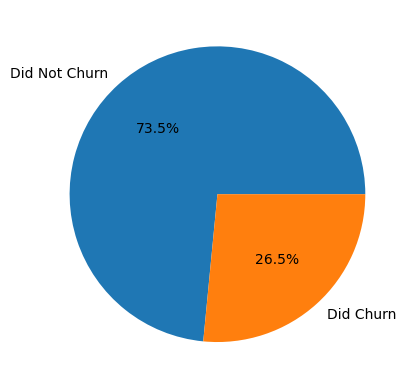

In [27]:
e.churn_pie(train)

# QUESTION 1: Do customers that have an automatic payment type more or less likely to churn?

* What's the relationship between churn and payment type?

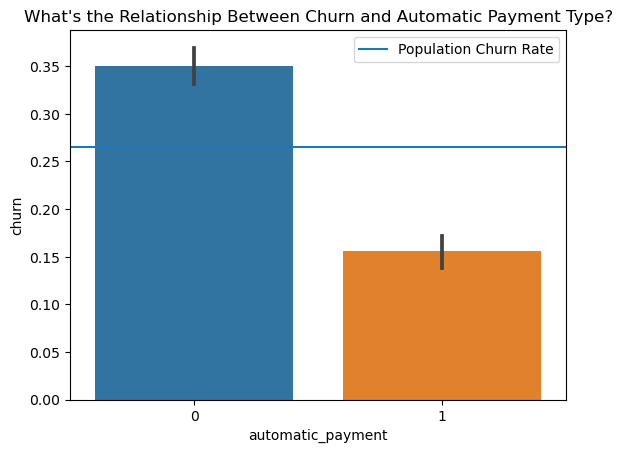

In [28]:
plt.title("What's the Relationship Between Churn and Automatic Payment Type?")
sns.barplot(x="automatic_payment", y="churn", data=train)
population_churn_rate = train.churn.mean()
plt.axhline(population_churn_rate, label="Population Churn Rate")
plt.legend()
plt.show()

In [29]:
# Setup a crosstab of observed survival to pclass
def cross_function(train, target_variable, feature_variable, null_hypothesis, alternative_hypothesis):
    '''
    This function will take the train df, target_variable, and feature_variable
    '''
    observed = pd.crosstab(train[target_variable], train[feature_variable])

    chi2, p, degf, expected = stats.chi2_contingency(observed)

    if p < alpha:
        print(f"Reject the null hypothesis: {null_hypothesis}")
        print(f"Sufficient evidence to move forward understanding that, {alternative_hypothesis}")
    else:
        print("Fail to reject the null")
        print("Insufficient evidence to reject the null")
    return p

Do customers that have an automatic payment type more or less likely to churn?

In [30]:
alpha_Q1 = 0.05
target_Q1 = "churn"
feature_variable_Q1 = "automatic_payment"
null_hypothesis_Q1 = "churn and automatic payment are independent"
alternative_hypothesis_Q1 = "there is a relationship between automatic payment and churn"

# Question 2:  Do customers that have paperless billing more or less likely to churn?
* What's the relationship between churn and paperless billing?

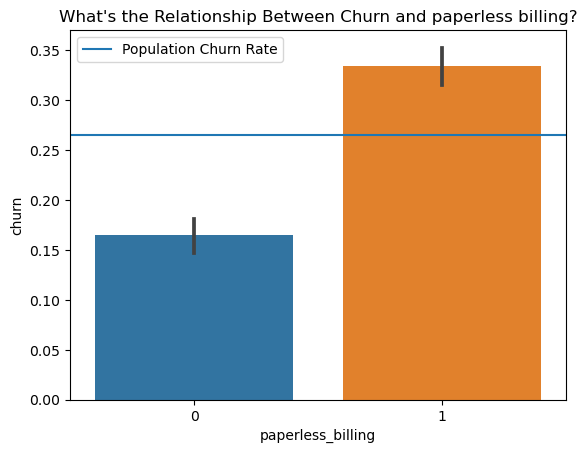

In [31]:
plt.title("What's the Relationship Between Churn and paperless billing?")
sns.barplot(x="paperless_billing", y="churn", data=train)
population_churn_rate = train.churn.mean()
plt.axhline(population_churn_rate, label="Population Churn Rate")
plt.legend()
plt.show()

In [32]:
# Chi squared to compare proportions, define confidence
alpha_Q2 = 0.05
target_Q2 = "churn"
feature_variable_Q2 = "paperless_billing"
null_hypothesis_Q2 = "churn and paperless_billing are independent"
alternative_hypothesis_Q2 = "there is a relationship between paperless_billing and churn"

e.cross_function(train, target, feature_variable_Q2, null_hypothesis_Q2, alternative_hypothesis_Q2)

Reject the null hypothesis: churn and paperless_billing are independent
Sufficient evidence to move forward understanding that, there is a relationship between paperless_billing and churn
 chi^2 = 148.58446697144495 p = 3.5348504574964642e-34


# Question 3: Do customers that have partner more or less likely to churn?
* What's the relationship between churn and customers' with partners?

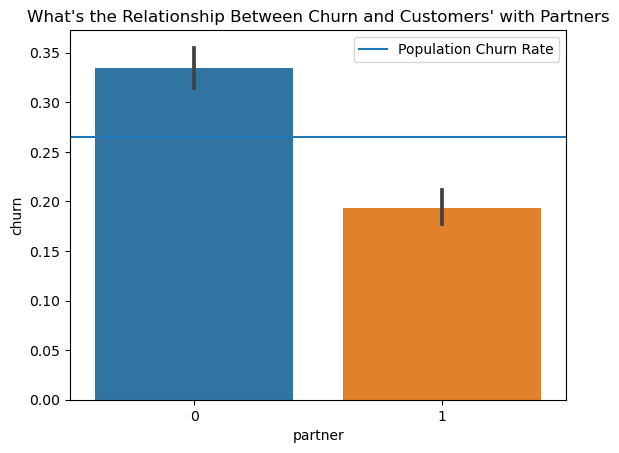

In [33]:
plt.title("What's the Relationship Between Churn and Customers' with Partners")
sns.barplot(x="partner", y="churn", data=train)
population_churn_rate = train.churn.mean()
plt.axhline(population_churn_rate, label="Population Churn Rate")
plt.legend()
plt.show()

def relationship_churn(train, graph_title, feature, target):
    '''
    This function will take the train, graph_title, feature, and target,
    and it will display a bargraph based on the information provided for the churn dataset 

    '''
    fig, ax =plt.subplots()
    plt.title(graph_title)
    sns.barplot(x=feature, y=target, data=train)
    population_churn_rate = train.churn.mean()

    tick_label = ["No", "Yes"]
    ax.set_xticklabels(tick_label)
    # sns.distplot(train)

    plt.axhline(population_churn_rate, label="Population Churn Rate")
    plt.legend()
    plt.show()

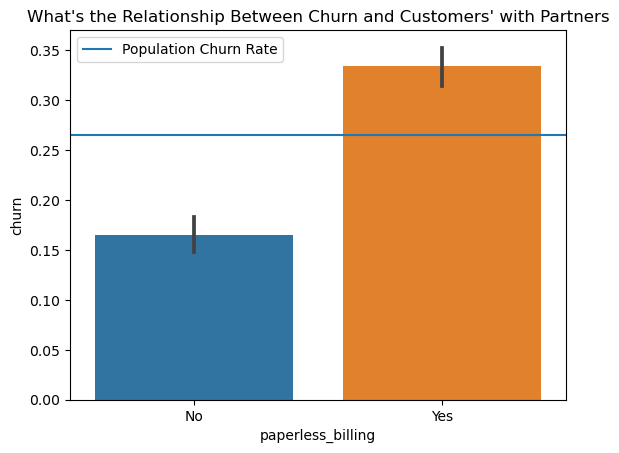

In [34]:
relationship_churn(train, "What's the Relationship Between Churn and Customers' with Partners", feature_variable_Q2, target)

In [35]:
# Chi squared to compare proportions, define confidence
alpha_Q3 = 0.05
target_Q3 = "churn"
feature_variable_Q3 = "partner"
null_hypothesis_Q3 = "churn and customers' with partners are independent"
alternative_hypothesis_Q3 = "there is a relationship between customers' with partners and churn"

e.cross_function(train, target, feature_variable_Q3, null_hypothesis_Q3, alternative_hypothesis_Q3)

Reject the null hypothesis: churn and customers' with partners are independent
Sufficient evidence to move forward understanding that, there is a relationship between customers' with partners and churn
 chi^2 = 106.63124069338238 p = 5.362120825511991e-25


# Question 4: Do customers that have dependents more or less likely to churn?
* What's the relationship between churn and customers' with dependents?

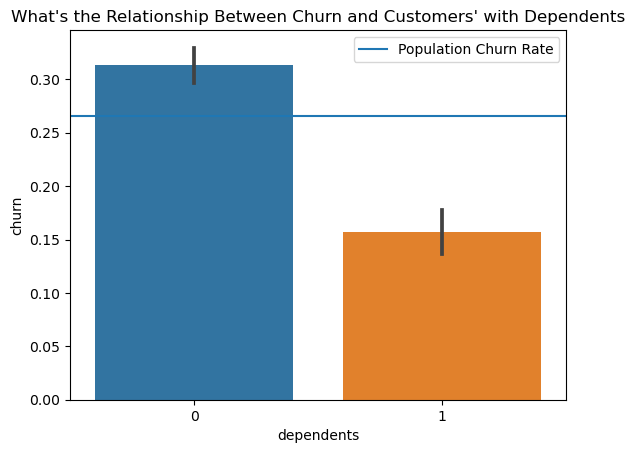

In [36]:
plt.title("What's the Relationship Between Churn and Customers' with Dependents")
sns.barplot(x="dependents", y="churn", data=train)
population_churn_rate = train.churn.mean()
plt.axhline(population_churn_rate, label="Population Churn Rate")
plt.legend()
plt.show()

In [37]:
alpha_Q4 = 0.05
target_Q4 = "churn"
feature_variable_Q4 = "dependents"
null_hypothesis_Q4 = "churn and customers' with dependents are independent"
alternative_hypothesis_Q4 = "there is a relationship between customers' with dependents and churn"

e.cross_function(train, target, feature_variable_Q4, null_hypothesis_Q4, alternative_hypothesis_Q4)

Reject the null hypothesis: churn and customers' with dependents are independent
Sufficient evidence to move forward understanding that, there is a relationship between customers' with dependents and churn
 chi^2 = 111.74045071817626 p = 4.0728740930257527e-26


In [38]:
# Question 5: What's the relationship between churn and gender?

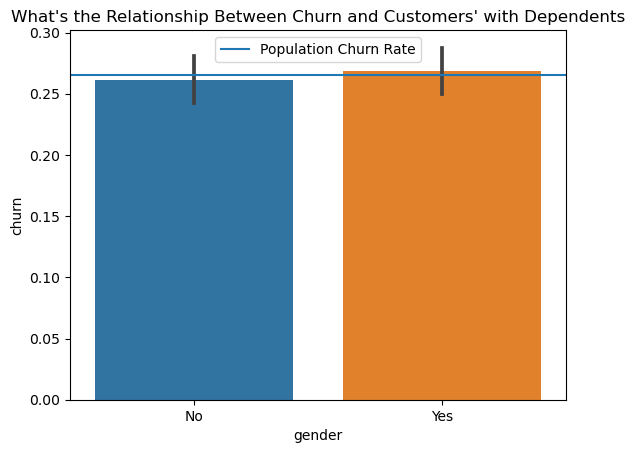

In [39]:
graph_title_Q5 = "What's the Relationship Between Churn and Customers' with Dependents"
feature_Q5 = "gender"

e.relationship_churn(train, graph_title_Q5, feature_Q5, target)

In [40]:
**I will use chi-square to investigate the relationship between churning and gender**

* I will use a confidence interval of 95%
* The alpha is .05


* $H_o$: 'Churn' and 'Gender' are independent.
* $H_a$: 'Churn' and 'Gender' are related.

SyntaxError: invalid syntax (3353037692.py, line 1)

In [41]:
null_hypothesis_Q5 = "'Churn' and 'Gender' are independent."
alternative_hypothesis_Q5 = "'Churn' and 'Gender' are related."

e.cross_function(train, target, feature_Q5, null_hypothesis_Q5, alternative_hypothesis_Q5)

Fail to reject the null
Insufficient evidence to reject the null
 chi^2 = 0.26001085636614296 p = 0.6101126964282866


* positive class:  not churned
* negative class:  churned

# Decision Tree Model  

In [28]:
def create_x_y(train, validate, test, target):
    """
    This function creates x and y variables for either a decision tree or a random forest, 
    by using the unsplit df, target variable columns name and column to drop, for multiple columns that need to be 
    dropped create a list of the columns0
    The arguments taken in are train, validate, test, target, drop_col=[])
    The function returns x_train, y_train, x_validate, y_validate, x_test, y_test
    """
    # separates train target variable
    x_train = train.drop(columns=[target])
    y_train = train[target]
    # validate 
    x_validate = validate.drop(columns=[target])
    y_validate = validate[target]

    # test
    x_test = test.drop(columns=[target])
    y_test = test[target]
    
    return x_train, y_train, x_validate, y_validate, x_test, y_test

In [29]:
x_train, y_train, x_validate, y_validate, x_test, y_test = create_x_y(train, validate, test, target)


In [30]:
# creating baseline:  1's = churned & 0's = not churned  baseline accuracy = 0.7346745562130178
# positive if not churned
baseline_accuracy = (train.churn == 0).mean()
baseline_accuracy


0.7346745562130178

In [31]:
# creating baseline:  1's = churned & 0's = not churned  baseline accuracy = 0.7346745562130178
# positive if not churned 
baseline_accuracy = (train.churn == 0).mean()
baseline_accuracy


0.7346745562130178

In [32]:
# using a function to get x & y variables for the split dataset
drop_gender = ["partner", "dependents", "paperless_billing", "automatic_payment", "churn"]
x_train, y_train, x_validate, y_validate, x_test, y_test = create_x_y(train_2[drop_gender], validate_2[drop_gender], test_2[drop_gender], target)

In [33]:
# using a function to get x & y variables for the split dataset
drop_gender = ["partner", "dependents", "paperless_billing", "automatic_payment", "churn"]
x_train_2, y_train_2, x_validate_2, y_validate_2, x_test_2, y_test_2 = create_x_y(train, validate, test, target)


In [34]:
# create object 
tree = DecisionTreeClassifier(random_state=3)

# model.fit(x, y)
tree = tree.fit(x_train, y_train)
x_train_2

,partner,dependents,paperless_billing,automatic_payment,gender
5911,0,1,1,1,1
2479,1,0,0,0,0
5889,0,0,1,0,0
6087,0,0,1,1,1
785,0,0,0,1,0
...,...,...,...,...,...
6102,1,0,0,1,0
356,0,0,1,0,0
1756,0,0,1,0,1
2127,0,0,0,0,1


In [55]:
# create object 
tree_2 = DecisionTreeClassifier(max_depth=3, random_state=3)

# model.fit(x, y)
tree_2 = tree_2.fit(x_train, y_train)

# score for train = 0.7401183431952663 --- this is greater than the baseline
train_accuracy_2 = tree_2.score(x_train, y_train)

# score for validate = 0.7196593328601846 --- this is less than the baseline
validate_accuracy_2 = tree_2.score(x_validate, y_validate)
train_accuracy_2, validate_accuracy_2

def dt_accuracy(tree, x_train, y_train, x_validate, y_validate):
    '''
    This function provides a quick print output of the train and validation scores based on your decision tree, for easy viewing.
    The function takes the following arguments: tree, x_train, y_train, x_validate, y_validate
    '''
    print(f'''

    Accuracy of Decision Tree classifier on training set: {round(tree.score(x_train, y_train),2)}
    Accuracy of Decision Tree classifier on validation set: {round(tree.score(x_validate, y_validate),2)}
    ''')

In [56]:
dt_accuracy(tree, x_train, y_train, x_validate, y_validate)



    Accuracy of Decision Tree classifier on training set: 0.74
    Accuracy of Decision Tree classifier on validation set: 0.72
    


In [57]:
# make prediction on train obeservations
y_pred = tree.predict(x_train)

#estimate probablility 
y_pred_proba = tree.predict_proba(x_train)

# create confusion matrix
conf = confusion_matrix(y_train, y_pred)

# nice dataframe with conf
labels = sorted(y_train.unique())
pd.DataFrame(conf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])

,0_predict,1_predict
0_actual,2724,380
1_actual,718,403


In [58]:
def dt_predict(tree, x_train, y_train):    
    # make prediction on train obeservations
    y_pred = tree.predict(x_train)

    #estimate probablility 


    # create confusion matrix
    conf = confusion_matrix(y_train, y_pred)

    # nice dataframe with conf
    labels = sorted(y_train.unique())
    df = pd.DataFrame(conf,
                index=[str(label) + '_actual'for label in labels],
                columns=[str(label) + '_predict'for label in labels])
    return df

In [59]:
dt_predict(tree_3, x_train_2, y_train_2)

NameError: name 'tree_3' is not defined

In [ ]:
TP, FP, FN, TN = conf.ravel()
TP

In [ ]:
# check accuracy 
accuracy_score(y_train, y_pred)

In [ ]:

scores_all = []

for x in range(1,20):

    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(x_train, y_train)
    train_acc = tree.score(x_train, y_train)
    
    #evaluate on validate
    val_acc = tree.score(x_validate, y_validate)
    
    scores_all.append([x, train_acc, val_acc])

In [ ]:
scores_all


In [ ]:
def tree_depth(scores):
    plt.figure(figsize=(12,6))
    plt.plot(scores.max_depth, scores.train_acc, label='train', marker='o')
    plt.plot(scores.max_depth, scores.val_acc, label='validation', marker='o')
    plt.xlabel('max depth')
    plt.ylabel('accuracy')
    plt.title('how does the accuracy change with max depth on train and validate?')
    plt.legend()
    plt.show()

In [ ]:
def depth_check(x_train, y_train, x_validate, y_validate):
    scores_all = []
    for x in range(1,20):

        tree = DecisionTreeClassifier(max_depth=x, random_state=3)
        tree.fit(x_train, y_train)
        train_acc = tree.score(x_train, y_train)

        #evaluate on validate
        val_acc = tree.score(x_validate, y_validate)

        scores_all.append([round(x, 6), round(train_acc, 6), round(val_acc, 6)])
        
    scores = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
    
    scores['diff'] = round(scores.train_acc - scores.val_acc, 6)
    return scores
    
    
    
    

In [ ]:
def dt_depth_graph(x_train, y_train, x_validate, y_validate):
    '''
    This function takes in: x_train, y_train, x_validate, y_validate
    Which then runs through a range of (1,20) to help determine the best parameter for max_depth.
    It outputs a visual graph and a table with the accuracy results and difference in score for better viewing. 
    '''

    # create scoring table
    scores = depth_check(x_train, y_train, x_validate, y_validate)


    # creating graph
    fig = plt.figure(figsize=(15,8))
    fig.suptitle('how does the accuracy change with max depth on train and validate?')
    
    ax1 = fig.add_subplot(121)
    

    ax1.plot(scores.max_depth, scores.train_acc, label='train', marker='o')
    ax1.plot(scores.max_depth, scores.val_acc, label='validation', marker='o')

    ax1.legend()

#     Create visual table
    ax2 = fig.add_subplot(122)
    font_size=9
    bbox=[0, 0, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText = scores.values, rowLabels = scores.index, bbox=bbox, colLabels=scores.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    

In [ ]:
m.dt_depth_graph(x_train, y_train, x_validate, y_validate)

In [ ]:
scores = depth_check(x_train, y_train, x_validate, y_validate)
scores


In [ ]:
tree_depth(scores)

In [ ]:
scores_2 = depth_check(x_train_2, y_train_2, x_validate_2, y_validate_2)

In [ ]:
scores_2

In [ ]:
tree_depth(scores_2)

In [ ]:
# Changed max_depth to 3 because of prior results
tree_2 = DecisionTreeClassifier(max_depth=3, random_state=3)

# model.fit(x, y)
tree_2 = tree_2.fit(x_train, y_train)

# score for train = 0.7401183431952663 --- this is greater than the baseline
train_accuracy_2 = tree_2.score(x_train, y_train)

# score for validate = 0.7196593328601846 --- this is less than the baseline
validate_accuracy_2 = tree_2.score(x_validate, y_validate)
train_accuracy_2, validate_accuracy_2

print(f'''

Accuracy of Decision Tree classifier on training set: {round(tree_2.score(x_train, y_train),2)}
Accuracy of Decision Tree classifier on validation set: {round(tree_2.score(x_validate, y_validate),2)}
''')

In [ ]:
# Changed max_depth to 3 because of prior results
tree_3 = DecisionTreeClassifier(max_depth=5, random_state=3)

# model.fit(x, y)
tree_3 = tree_3.fit(x_train_2, y_train_2)

# score for train = 0.7401183431952663 --- this is greater than the baseline
train_accuracy_3 = tree_3.score(x_train_2, y_train_2)

# score for validate = 0.7196593328601846 --- this is less than the baseline
validate_accuracy_3 = tree_3.score(x_validate_2, y_validate_2)


print(f'''

Accuracy of Decision Tree classifier on training set: {round(tree_3.score(x_train_2, y_train_2),2)}
Accuracy of Decision Tree classifier on validation set: {round(tree_3.score(x_validate_2, y_validate_2),2)}
''')

In [ ]:
def best_tree(x_train, y_train, x_validate, y_validate):
    tree = DecisionTreeClassifier(max_depth=3, random_state=3)

    # model.fit(x, y)
    tree = tree.fit(x_train, y_train)

    # score for train
    train_accuracy = tree.score(x_train, y_train)

    # score for validate
    validate_accuracy = tree.score(x_validate, y_validate)


    print(f'''

    Accuracy of Decision Tree classifier on training set: {round(tree.score(x_train, y_train),3)}
    Accuracy of Decision Tree classifier on validation set: {round(tree.score(x_validate, y_validate),3)}
    ''')

# Random Forest model

In [35]:
m.best_tree(x_train, y_train, x_validate, y_validate)

NameError: name 'best_tree' is not defined

In [36]:
# create object
rf = RandomForestClassifier(random_state=3)

# fit model
rf.fit(x_train, y_train)

# evaluate feature importance
print(rf.feature_importances_)

[0.11720507 0.15751509 0.31153932 0.41374053]


In [37]:
# create prdictions
y_pred_rf = rf.predict(x_train)

# Estimate the probability
y_pred_proba_rf = rf.predict_proba(x_train)


In [38]:
# create confusion matrix
conf_rf = confusion_matrix(y_train, y_pred_rf)

# nice dataframe with conf
labels = sorted(y_train.unique())
pd.DataFrame(conf_rf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])


,0_predict,1_predict
0_actual,2724,380
1_actual,718,403


In [ ]:
print(classification_report(y_train, y_pred_rf))

In [ ]:
# evaluate model 
# rf train accuracy score = 0.7401183431952663
rf.score(x_train, y_train)

# rf  validate accuracy score = 0.7196593328601846
rf.score(x_validate, y_validate)

In [ ]:
x_train

In [ ]:
def leaf_check(x_train, y_train, x_validate, y_validate):
    scores_all = []

    for x in range(1,11):

        #make it
        rf = RandomForestClassifier(random_state=3, min_samples_leaf=x, max_depth=11-x)
        #fit it
        rf.fit(x_train, y_train)
        #transform it
        train_acc = rf.score(x_train, y_train)

        #evaluate on my validate data
        val_acc = rf.score(x_validate, y_validate)

        scores_all.append([x, 11-x, round(train_acc, 4), round(val_acc, 4)])

    scores_df = pd.DataFrame(scores_all, columns=['min_samples_leaf','max_depth','train_acc','val_acc'])
    scores_df['difference'] = round(scores_df.train_acc - scores_df.val_acc, 3)
    return scores_df

        
    

In [ ]:
def leaf_check2(x_train, y_train, x_validate, y_validate):
    scores_all = []

    for x in range(1,11):

        #make it
        rf = RandomForestClassifier(random_state=3, max_depth=x)
        #fit it
        rf.fit(x_train, y_train)
        #transform it
        train_acc = rf.score(x_train, y_train)

        #evaluate on my validate data
        val_acc = rf.score(x_validate, y_validate)

        scores_all.append([x, round(train_acc, 4), round(val_acc, 4)])

    scores_df = pd.DataFrame(scores_all, columns=['min_samples_leaf','train_acc','val_acc'])
    scores_df['difference'] = round(scores_df.train_acc - scores_df.val_acc, 3)
    return scores_df

In [ ]:
leaf_check(x_train, y_train, x_validate, y_validate)

In [ ]:
def rf_graph(scores_df):
    plt.figure(figsize=(12,6))
    plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
    plt.plot(scores_df.max_depth, scores_df.val_acc, label='validation', marker='o')
    plt.xlabel('max depth and min leaf sample')
    plt.ylabel('accuracy')

    plt.xticks([2,4,6,8,10],
              [('2 and 9'),('4 and 7'),('6 and 5'),('8 and 4'),('10 and 2')]
              )

    plt.title('how does the accuracy change with max depth on train and validate?')
    plt.legend()
    plt.show()

In [ ]:
def rf_leaf_graph(x_train, y_train, x_validate, y_validate):
    '''
    This function takes in: x_train, y_train, x_validate, y_validate
    Which then runs through a range of (1,11)-min_samples_leaf and descending (1,11) for max_depth to help determine the best parameters
    It outputs a visual graph and a table with the accuracy results and difference in score for better viewing. 
    '''

    # create scoring table
    scores = leaf_check(x_train, y_train, x_validate, y_validate)


    # creating graph
    fig = plt.figure(figsize=(15,8))
    fig.suptitle('how does the accuracy change with (min_samples_leaf asc. 1,11) and (max depth desc. 1,11) on train and validate?')
    
    ax1 = fig.add_subplot(121)
    

    ax1.plot(scores.max_depth, scores.train_acc, label='train', marker='o')
    ax1.plot(scores.max_depth, scores.val_acc, label='validation', marker='o')
    ax1.set_xlabel('max depth and min leaf sample')
    ax1.set_ylabel('accuracy')
    ax1.legend()

#     Create visual table
    ax2 = fig.add_subplot(122)
    font_size=9
#     bbox=[0, 0, 1, 1]
    ax2.axis('off')
    mpl_table = ax2.table(cellText = scores.values, rowLabels = scores.index, bbox=bbox, colLabels=scores.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)


In [ ]:
scores_3 = leaf_check(x_train_2, y_train_2, x_validate_2, y_validate_2)
scores_3


In [ ]:
scores_f = leaf_check2(x_train, y_train, x_validate, y_validate)
scores_f

In [ ]:
rf_graph(scores_3)

In [ ]:
# Changed max_depth to 3 because of prior results
rf_3 = RandomForestClassifier(random_state=3, max_depth=3)

# model.fit(x, y)
rf_3 = rf_3.fit(x_train_2, y_train_2)

print(f'''

Accuracy of Decision Tree classifier on training set: {round(rf_3.score(x_train_2, y_train_2),4)}
Accuracy of Decision Tree classifier on validation set: {round(rf_3.score(x_validate_2, y_validate_2),4)}
''')
baseline_accuracy

In [ ]:
m.best_forest(x_train, y_train, x_validate, y_validate)

# Logisitics Regression Model

In [ ]:
# create object
logit = LogisticRegression()

# model fit 
logit.fit(x_train, y_train)

In [ ]:
logit_2 = LogisticRegression()

# model fit 
logit_2.fit(x_train_2, y_train_2)
print(f'''
    Accuracy of Logistic Regression classifier on training set: {round(logit_2.score(x_train_2, y_train_2),2)}
    Accuracy of Logistic Regression classifier on validation set: {round(logit_2.score(x_validate_2, y_validate_2),2)}
''')

In [ ]:
def clf_accuracy(clf, x_train, y_train, x_validate, y_validate):
    '''
    This function provides a quick print output of the train and validation scores based on your decision tree, for easy viewing.
    The function takes the following arguments: object name (clf), x_train, y_train, x_validate, y_validate
    '''
    print(f'''
    Accuracy of {clf} on training set: {round(clf.score(x_train, y_train), 3)}
    Accuracy of {clf} on validation set: {round(clf.score(x_validate, y_validate), 3)}
    ''')

In [ ]:
clf_accuracy(rf, x_train_2, y_train_2, x_validate_2, y_validate_2)

In [ ]:
# evaluate importance of each feature
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)


In [ ]:
# make predictions
y_pred_lr = logit.predict(x_train)
y_pred_proba_lr = logit.predict_proba(x_train)
# compute accuracy
print(f'''
    Accuracy of Logistic Regression classifier on training set: {round(logit.score(x_train, y_train),2)}
    Accuracy of Logistic Regression classifier on validation set: {round(logit.score(x_validate, y_validate),2)}
''')

print(confusion_matrix(y_train, y_pred_lr))


In [ ]:

def clf_predict(clf, x_train, y_train): 
    '''
    This function takes in the following arguments: tree, x_train, y_train
    Then uses the arguments to make predictions on the train observation,
    creating a matrix and a df of the matrix 
    '''   
    # make prediction on train obeservations
    y_pred = clf.predict(x_train)

    # create confusion matrix
    conf = confusion_matrix(y_train, y_pred)

    # nice dataframe with conf
    labels = sorted(y_train.unique())
    df = pd.DataFrame(conf,
                index=[str(label) + '_actual'for label in labels],
                columns=[str(label) + '_predict'for label in labels])
    return df

In [ ]:
clf_predict(rf_3, x_train_2, y_train_2)

In [ ]:
clf_predict(logit, x_train, y_train)

In [ ]:
# classification report
print(classification_report(y_train, y_pred_lr))
y_pred_proba_lr

In [ ]:
# Visualize #################################
# create array of probabilities of churning

y_pred_proba_churn = np.array([i[1] for i in y_pred_proba_lr])

fig = plt.figure()
plt.figure(figsize=(10,6))
ax = fig.add_subplot()


# scatter plot where x is the probabilities and y is the churn (0, 1)
ax.scatter(y_pred_proba_churn, y_pred_lr)


In [ ]:
y_pred_proba_churn[y_pred_proba_churn > 0.5]

In [ ]:
# Test Model
print(f'''
    Accuracy of Logistic Regression classifier on training set: {round(logit.score(x_train, y_train),2)}
    Accuracy of Logistic Regression classifier on validation set: {round(logit.score(x_validate, y_validate),2)}
    Accuracy of Logistic Regression classifier on test set: {round(logit.score(x_test, y_test),2)}
    
''')

In [ ]:
# Test Model 2
print(f'''
    Accuracy of Random Forest classifier on training set: {round(rf_3.score(x_train, y_train),2)}
    Accuracy of Random Forest classifier on validation set: {round(rf_3.score(x_validate_2, y_validate_2),2)}
    Accuracy of Random Forest  classifier on test set: {round(rf_3.score(x_test_2, y_test_2),2)}
    
''')

In [ ]:
def clf_test(clf, x_train, y_train, x_validate, y_validate, x_test, y_test):
    '''
    ! WARNING!: Only use this for your final model 
    This function provides a quick print output of the baseling accuracy train, validation, test scores based on your classifier, for easy viewing.
    The function takes the following arguments: object name (clf), x_train, y_train, x_validate, y_validate, x_test, y_test
    '''
    print(f'''
    Baseline Accuracy: {round(baseline_accuracy, 3)}
    Accuracy of {clf} on training set: {round(clf.score(x_train, y_train), 3)}
    Accuracy of {clf} on validation set: {round(clf.score(x_validate, y_validate), 3)}
    Accuracy of {clf} on test set: {round(clf.score(x_test, y_test), 3)}
    ''')

In [ ]:
clf_test(logit, x_train, y_train, x_validate, y_validate, x_test, y_test, )

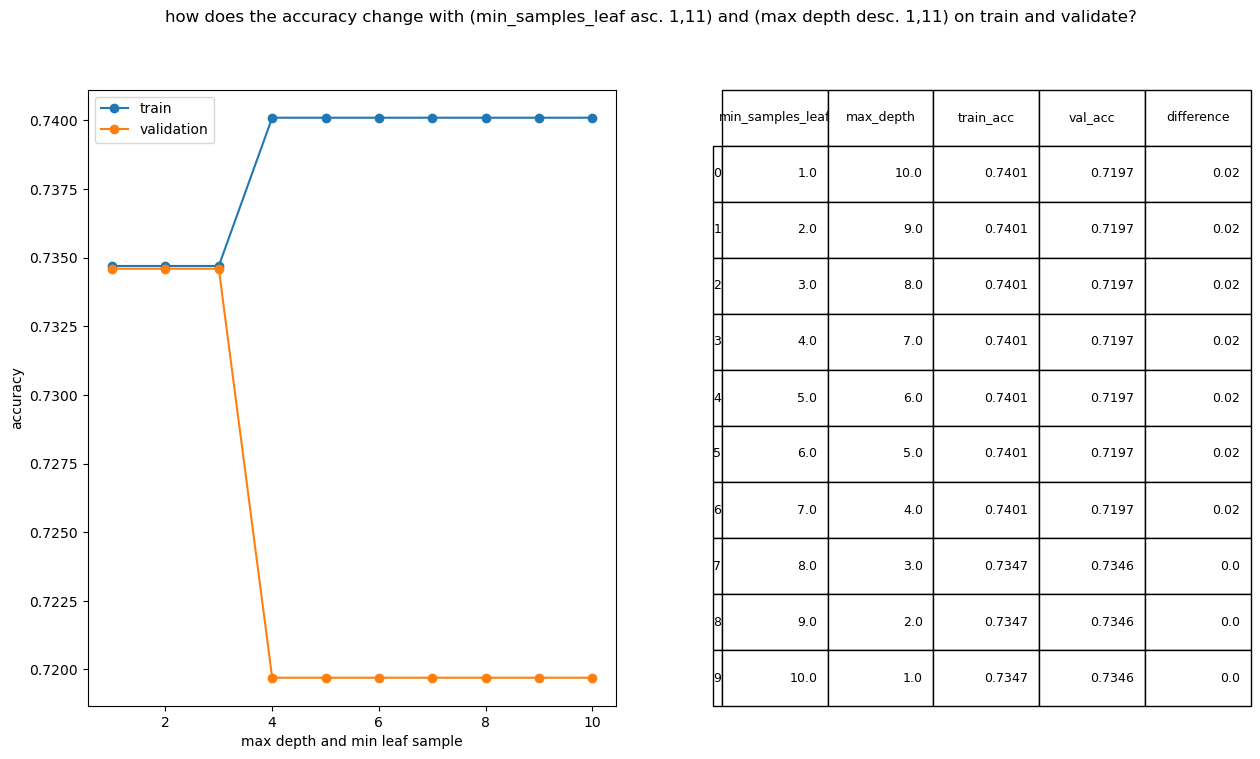

In [55]:
m.rf_leaf_graph(x_train, y_train, x_validate, y_validate)

# KNN model 

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)

In [ ]:
m.clf_accuracy(knn, x_train, y_train, x_validate, y_validate)

In [ ]:
m.clf_predict(knn, x_train, y_train)

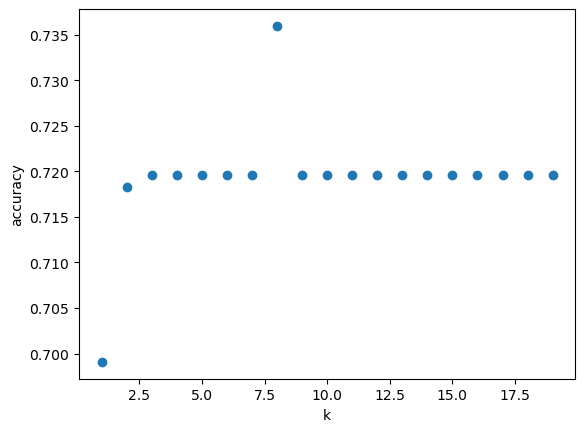

,partner,dependents,paperless_billing,automatic_payment,churn
3160,1,1,1,0,0
1577,1,0,0,1,0
6823,0,0,1,0,1
3615,0,0,1,0,0
882,0,0,1,0,1
...,...,...,...,...,...
1097,0,0,0,0,1
6441,0,0,1,0,1
5985,0,0,1,1,0
2452,1,1,0,1,0


In [146]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)

plt.show()
test

# Final test model 

In [161]:
m.best_model(x_train, y_train, x_validate, y_validate, x_test, y_test)



    Accuracy of RandomForestClassifier(max_depth=3, random_state=3) on training set: 0.73
    Accuracy of RandomForestClassifier(max_depth=3, random_state=3) on validation set: 0.73
    Accuracy of RandomForestClassifier(max_depth=3, random_state=3) on test set: 0.73
    


3160    0
1577    0
6823    1
3615    0
882     1
       ..
1097    1
6441    1
5985    0
2452    0
983     1
Name: churn, Length: 1409, dtype: uint8

In [172]:
# Create csv with test model and predictions

rf = RandomForestClassifier(random_state=3, max_depth=3)
rf = rf.fit(x_train, y_train)
test_pred = rf.predict(x_test)

y_pred_proba = rf.predict_proba(x_test)

prob_of_churn = y_pred_proba[:,1]
test_pred
test


,partner,dependents,paperless_billing,automatic_payment,churn
3160,1,1,1,0,0
1577,1,0,0,1,0
6823,0,0,1,0,1
3615,0,0,1,0,0
882,0,0,1,0,1
...,...,...,...,...,...
1097,0,0,0,0,1
6441,0,0,1,0,1
5985,0,0,1,1,0
2452,1,1,0,1,0


In [178]:
rf = RandomForestClassifier(random_state=3, max_depth=3)
rf = rf.fit(x_train, y_train)

In [186]:
# Create csv with test model and predictions


test_pred = rf.predict(x_test)

y_pred_proba = rf.predict_proba(x_test)

prob_of_churn = y_pred_proba[:,1]
test_pred

prob_of_churn

array([0.27036079, 0.10902405, 0.46835696, ..., 0.24828029, 0.07536532,
       0.46835696])

In [181]:
# create a dataframe with customer_id , probability of churn, and prediction
prediction_df = pd.DataFrame({'customer_id': tt.customer_id,
                              'probability_of_churn': rf.predict_proba(x_test)[:,1],
                              'prediction_of_churn': rf.predict(x_test)})
prediction_df.to_csv("prediction_df.csv")

In [183]:
prediction_df

,customer_id,probability_of_churn,prediction_of_churn
3160,4531-AUZNK,0.270361,0
1577,2296-DKZFP,0.109024,0
6823,9692-TUSXH,0.468357,0
3615,5129-JLPIS,0.468357,0
882,1273-MTETI,0.468357,0
...,...,...,...
1097,1597-FZREH,0.297827,0
6441,9117-SHLZX,0.468357,0
5985,8441-SHIPE,0.248280,0
2452,3511-BFTJW,0.075365,0


In [182]:
print(confusion_matrix(y_test, test_pred))

[[1035    0]
 [ 374    0]]


In [157]:
test_id = tt[["customer_id"]]
test_pred = pd.DataFrame(rf.predict(x_test))
test_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
1404,0
1405,0
1406,0
1407,0


In [ ]:
y_pred_proba[:5]

In [132]:
y_pred = rf.predict(x_test)

In [133]:
y_test.head()

3160    0
1577    0
6823    1
3615    0
882     1
Name: churn, dtype: uint8

In [140]:
pd.concat([test_id, test_pred], axis=1)

,customer_id,0
3160,4531-AUZNK,NaN
1577,2296-DKZFP,NaN
6823,9692-TUSXH,NaN
3615,5129-JLPIS,NaN
882,1273-MTETI,0.0
...,...,...
1404,NaN,0.0
1405,NaN,0.0
1406,NaN,0.0
1407,NaN,0.0


In [135]:
test_csv_pred

,customer_id,0
3160,4531-AUZNK,NaN
1577,2296-DKZFP,NaN
6823,9692-TUSXH,NaN
3615,5129-JLPIS,NaN
882,1273-MTETI,0.0
...,...,...
1404,NaN,0.0
1405,NaN,0.0
1406,NaN,0.0
1407,NaN,0.0


In [48]:
def prob_csv(tt, x_train, y_train, x_test, y_test):
    rf = RandomForestClassifier(random_state=3, max_depth=3)
    rf = rf.fit(x_train, y_train)
    prediction_df = pd.DataFrame({'customer_id': tt.customer_id,
                              'probability_of_churn': rf.predict_proba(x_test)[:,1],
                              'prediction_of_churn': rf.predict(x_test)})
    prediction_df.to_csv("prediction_df.csv")
    print(rf.predict(x_test))
    

In [54]:
y_test.value_counts()


0    1035
1     374
Name: churn, dtype: int64

In [49]:
prob_csv(tt, x_train, y_train, x_test, y_test)

[0 0 0 ... 0 0 0]


In [50]:
rf.score(x_test, y_test)

0.7359829666430092